In [8]:
from learningAgents import ReinforceAlgorithm
from environmentModel import Model, AdversaryModes
import torch
import torch.nn as nn
from torch.distributions import Categorical
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def NeuralNetwork():
    lr = .00001
    num_actions = 20

    nn_ = 100

    policy = nn.Sequential(
                           nn.Linear(2, nn_), 
                           nn.ReLU(),
                           nn.Linear(nn_,nn_),
                           nn.ReLU(),
                           nn.Linear(nn_,num_actions),                       
                           nn.Softmax(dim=0))
    optim = torch.optim.Adam(policy.parameters(), lr=lr)

    return policy, optim

In [10]:
nrows=6
dataset = dict()
for mode in AdversaryModes:
    game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 25,
            initState = [400/2,200], adversaryMode=mode)
    algorithm = ReinforceAlgorithm(game, NeuralNetwork, numberIterations=10, numberEpisodes=20000, discountFactor =0.9)
    algorithm.solver()
    profits = pd.DataFrame(game.profit).T
    profits.columns = ["learning Agent", "Adversary"]
    prices = pd.DataFrame(game.prices).T
    prices.columns = ["learning Agent", "Adversary"]    
    demandPotential = pd.DataFrame(game.demandPotential).T
    demandPotential.columns = ["learning Agent", "Adversary"]
    
    learning = pd.DataFrame(algorithm.returns.mean(axis = 0))
    learning.columns=['average']

    dataset[f"{mode.name}"] = (learning, demandPotential, prices, profits)

    

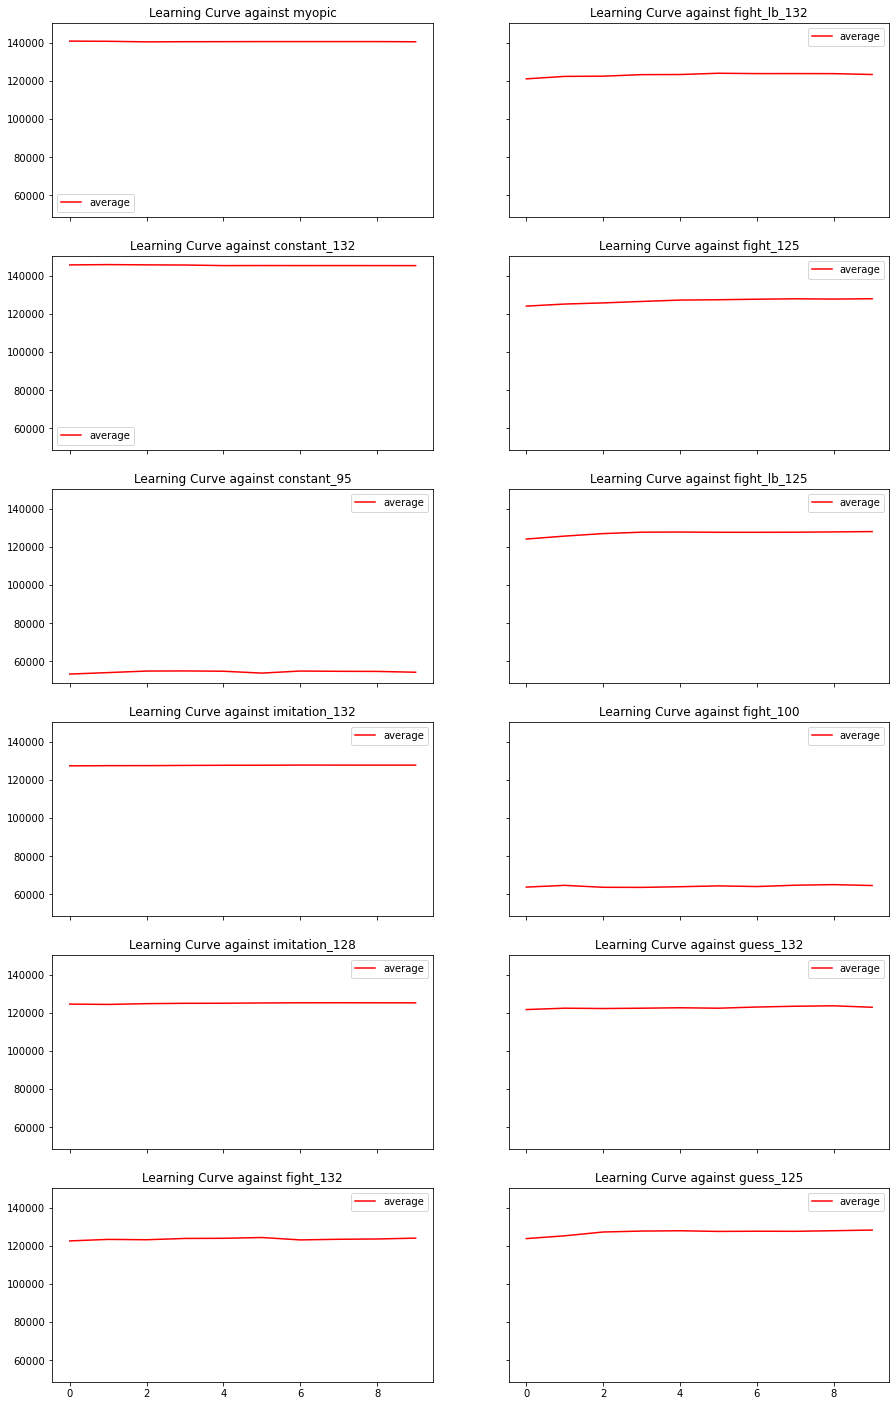

In [11]:
fig, axes = plt.subplots(nrows=nrows, ncols=2,sharex=True,sharey=True,figsize=(15,25))
for mode in AdversaryModes:
    ax=dataset[mode.name][0].plot(color='r', title=f"Learning Curve against {mode.name}", ax=axes[mode.value%nrows][int(mode.value/nrows)])
    

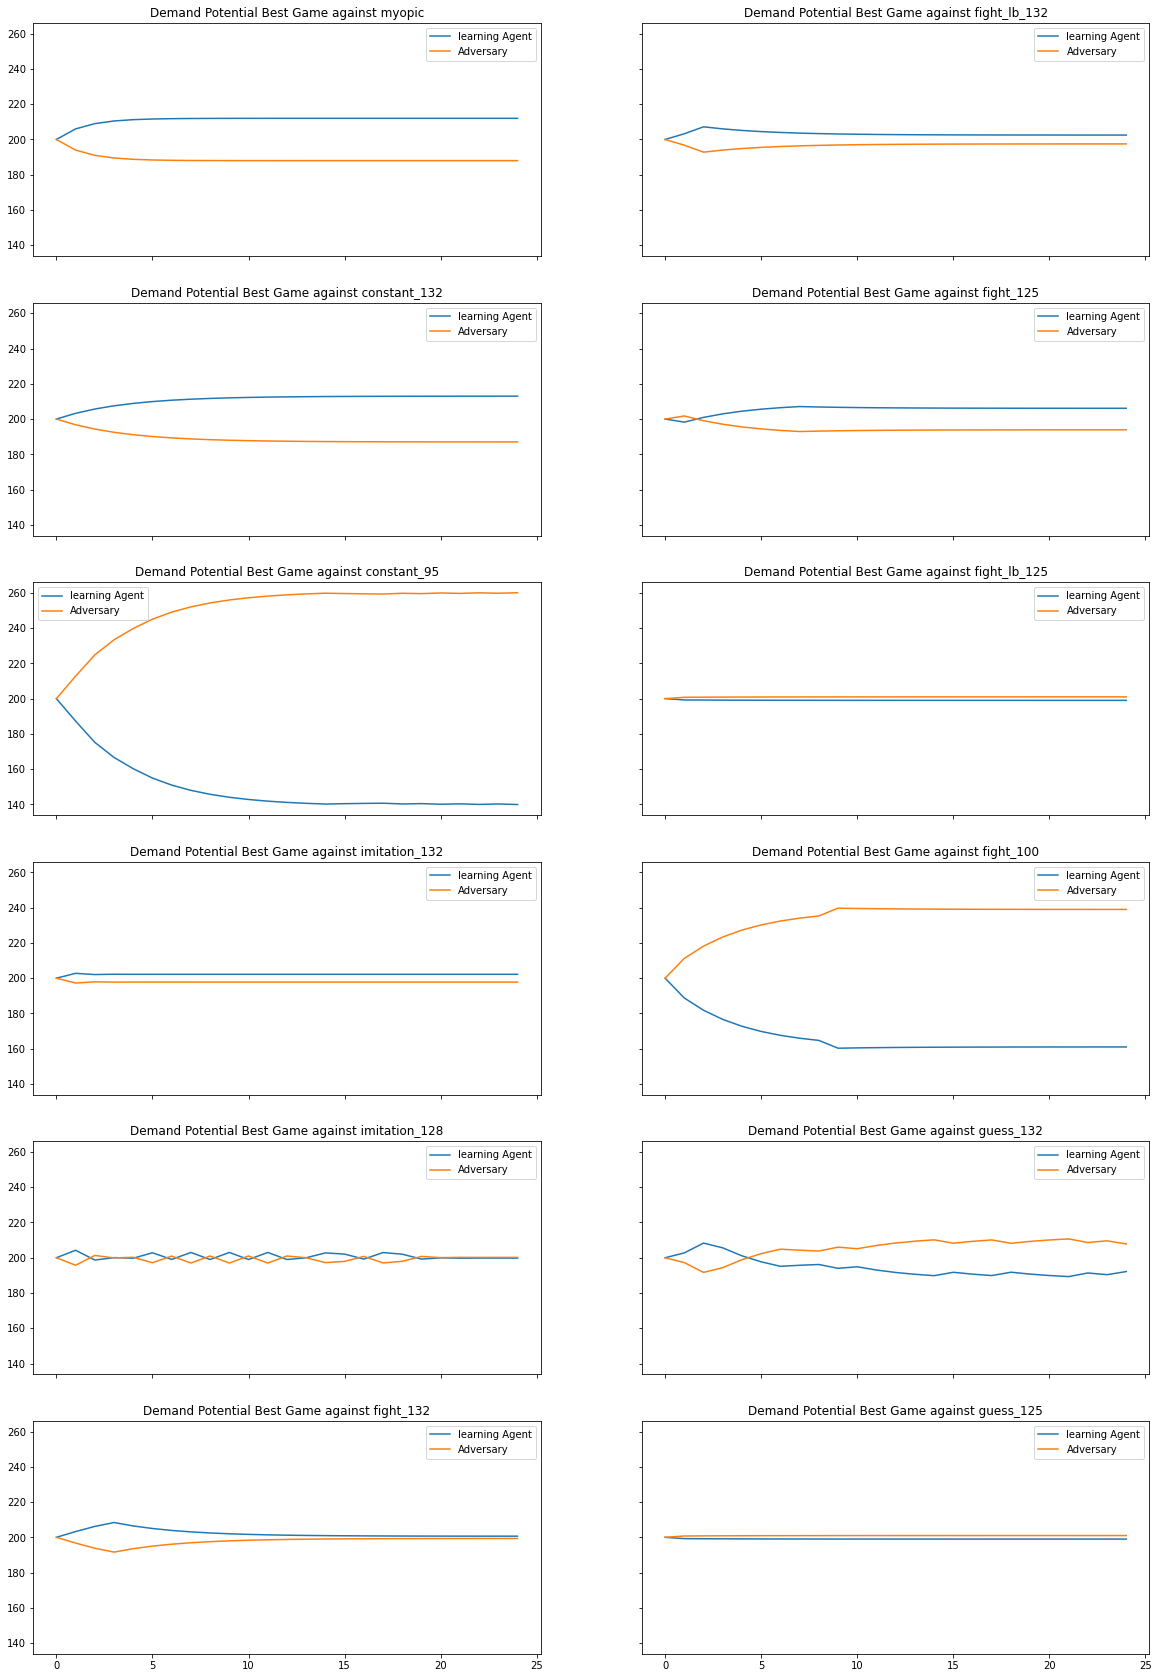

In [12]:
fig, axes = plt.subplots(nrows=nrows, ncols=2,sharex=True,sharey=True,figsize=(20,30))
for mode in AdversaryModes:
    ax=dataset[mode.name][1].plot(title=f"Demand Potential Best Game against {mode.name}", ax=axes[mode.value%nrows][int(mode.value/nrows)])
    

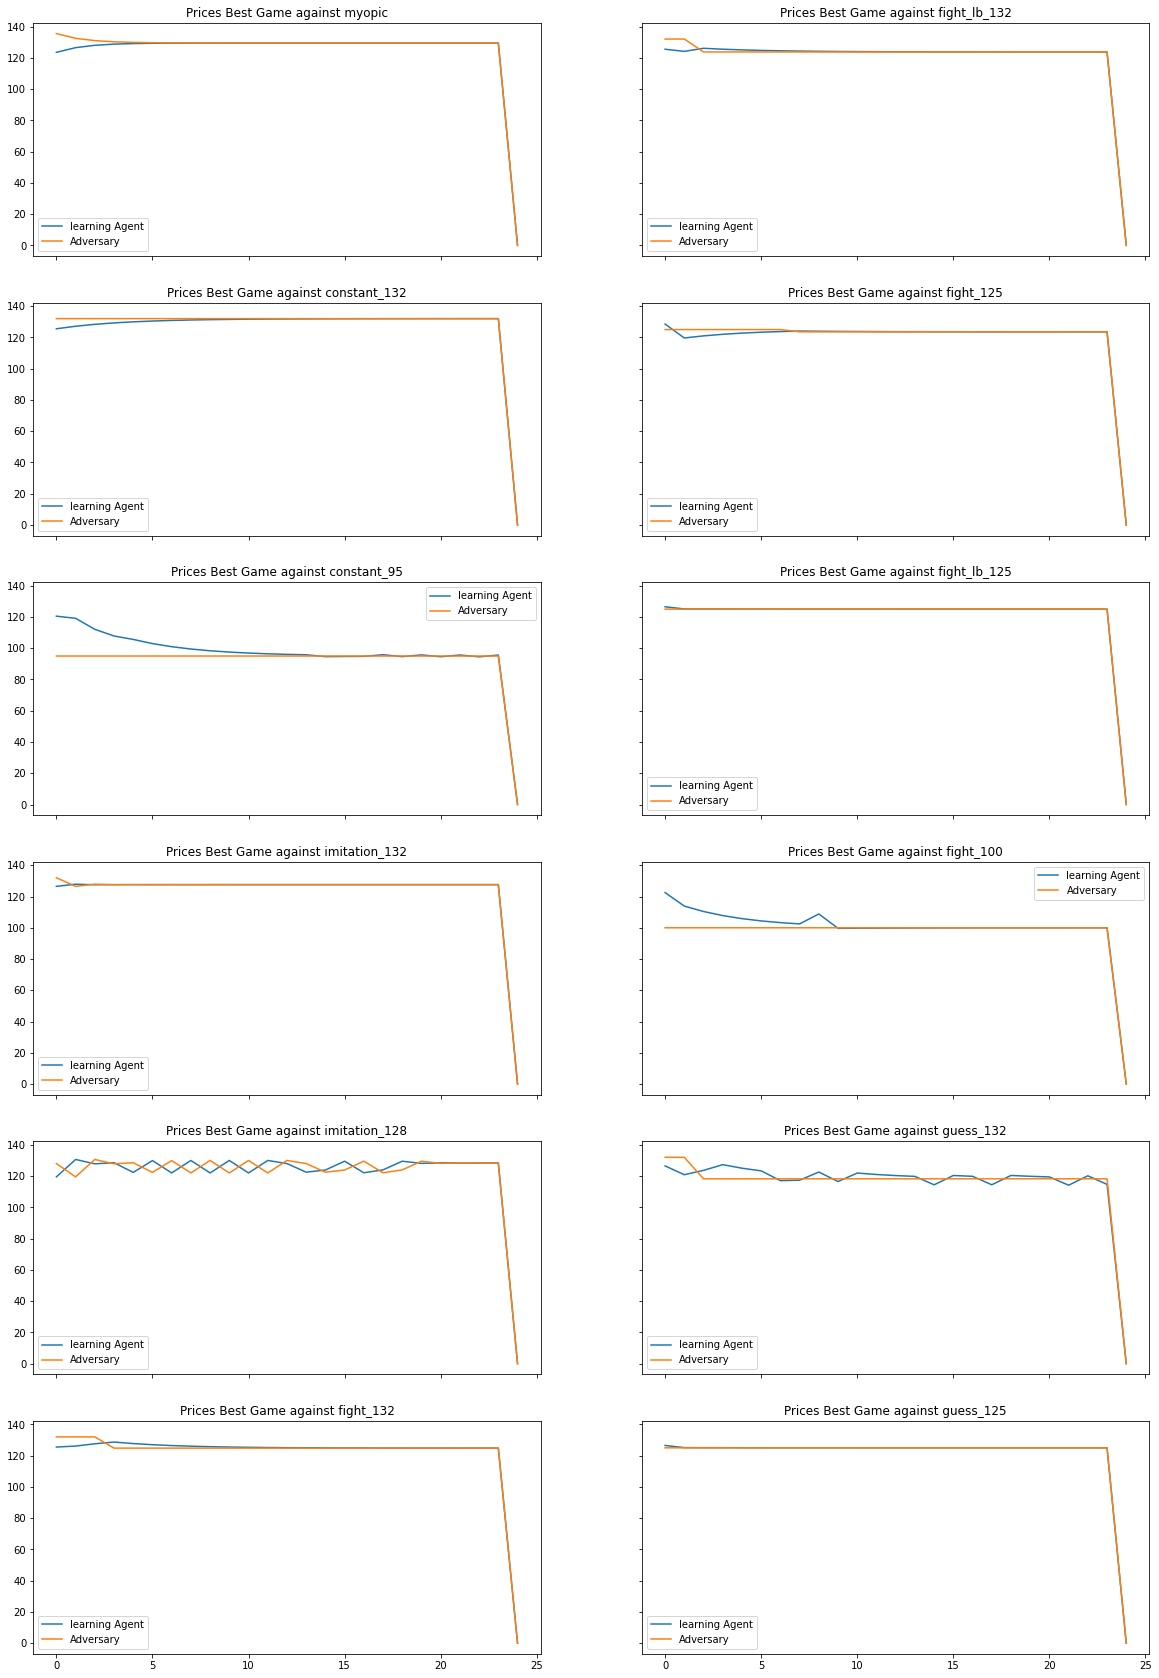

In [13]:
fig, axes = plt.subplots(nrows=nrows, ncols=2,sharex=True,sharey=True,figsize=(20,30))
for mode in AdversaryModes:
    ax=dataset[mode.name][2].plot(title=f"Prices Best Game against {mode.name}", ax=axes[mode.value%nrows][int(mode.value/nrows)])
    

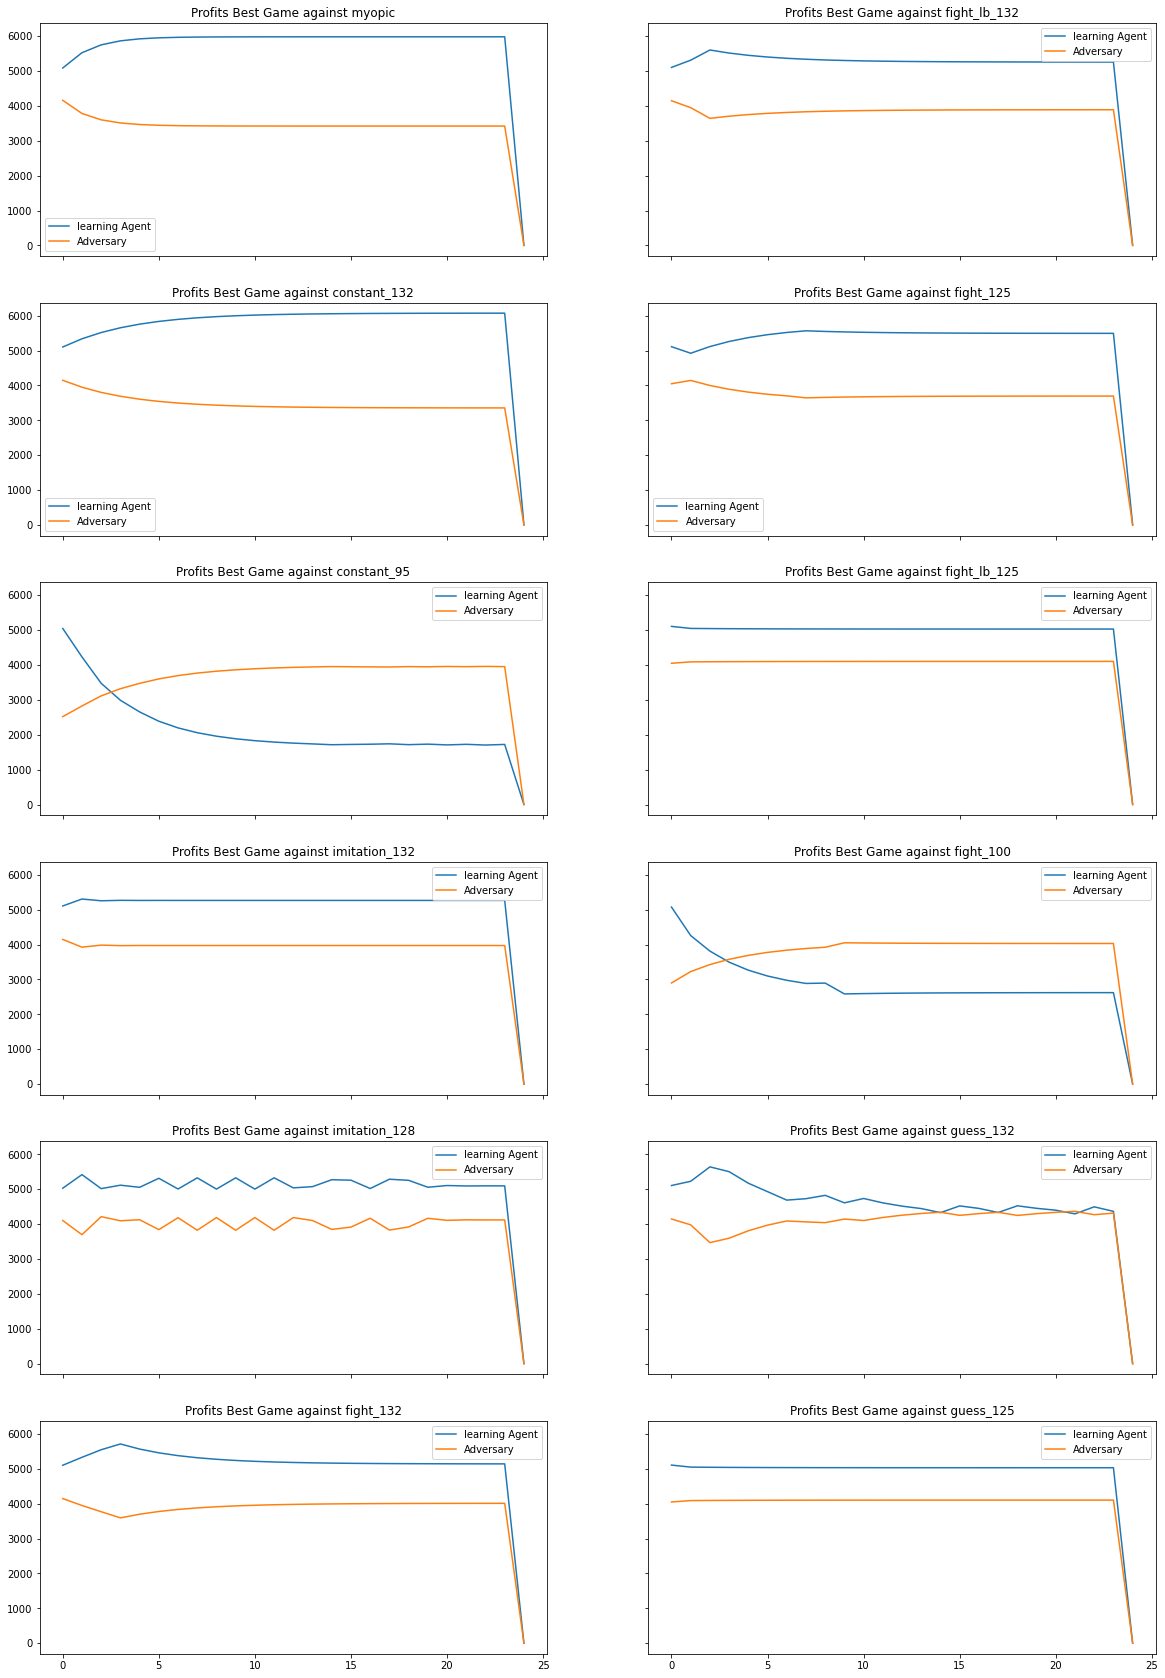

In [14]:
fig, axes = plt.subplots(nrows=nrows, ncols=2,sharex=True,sharey=True,figsize=(20,30))
for mode in AdversaryModes:
    ax=dataset[mode.name][3].plot(title=f"Profits Best Game against {mode.name}", ax=axes[mode.value%nrows][int(mode.value/nrows)])
    